## Q1).
 Write a linear congruential random number generator in Python. Use it to obtain
10,000 uniformly distributed random numbers between 0 and 1. Make a density histogram of your numbers and compare it to the uniform PDF.

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import time 


Time Taken to generate 10000 random numbers by lcg is  0.0021138000302016735


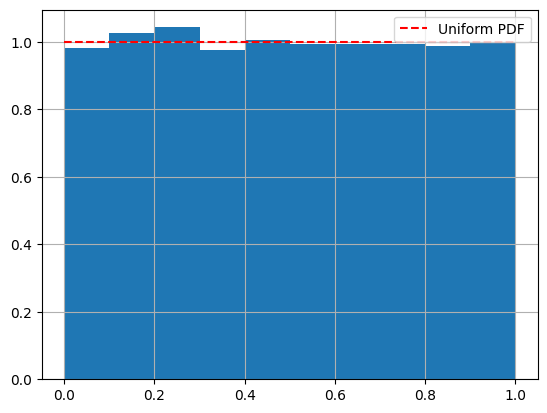

In [29]:
def lcg(x,size):
    m,a,c=116165,5678,672844
    sample=[]
    for i in range(size):
        x=(a*x+c)%m
        sample.append(x/m)
    return sample
start_time=time.perf_counter()
S=lcg(15486,10000)
end_time=time.perf_counter()
execution_time_lcg=end_time-start_time
print("Time Taken to generate 10000 random numbers by lcg is ",execution_time_lcg)

plt.hist(S,density= True,bins=10)
plt.grid()


x_values = np.linspace(0, 1, 1000)
uniform_pdf = np.ones_like(x_values)
plt.plot(x_values, uniform_pdf, 'r--', label='Uniform PDF')

plt.legend()
plt.show()




## Q.2)
Write a Python code to obtain 10,000 uniformly distributed random numbers between
0 and 1 using the library function np.random.rand(). Make a density histogram of
your numbers and compare it to the uniform PDF.

Time Taken to generate 10000 random numbers by random.rand is  0.0004920000210404396


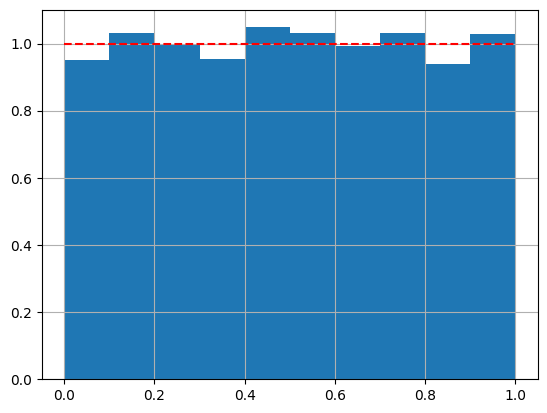

In [30]:
start_time=time.perf_counter()
S=np.random.rand(10000)
end_time=time.perf_counter()
execution_time_rand=end_time-start_time
print("Time Taken to generate 10000 random numbers by random.rand is ",execution_time_rand)


plt.hist(S,bins=10,density=True)
x_values = np.linspace(0, 1, 1000)
uniform_pdf = np.ones_like(x_values)
plt.plot(x_values, uniform_pdf, 'r--', label='Uniform PDF')
plt.grid()

## Q3).
 How long did each of your codes above take to produce 10,000 uniform deviates?


In [31]:
print("Time Taken to generate 10000 random numbers by lcg is ",execution_time_lcg)
print("Time Taken to generate 10000 random numbers by random.rand is ",execution_time_rand)

Time Taken to generate 10000 random numbers by lcg is  0.0021138000302016735
Time Taken to generate 10000 random numbers by random.rand is  0.0004920000210404396


## Q4)
Use the Transformation method in a C code to produce 10,000 random numbers distributed according to an exponential distribution with mean 0.5. Make a density
histogram of your numbers and compare it to the exponential PDF.

In [27]:
'''
#include <stdio.h>
#include <stdlib.h>
#include <math.h>

double exponential_distribution(double lambda) {
    double u = rand() / (RAND_MAX + 1.0); // Uniform random number between 0 and 1
    return -log(1 - u) / lambda; // Transformation method for exponential distribution
}

int main() {
    int i, n = 10000;
    double lambda = 0.5; // Mean of the exponential distribution
    double *random_numbers = malloc(n * sizeof(double));

    // Generate random numbers
    for (i = 0; i < n; i++) {
        random_numbers[i] = exponential_distribution(lambda);
    }

    // Write random numbers to a file
    FILE *fp;
    fp = fopen("random_numbers.txt", "w");
    if (fp == NULL) {
        printf("Error opening file.\n");
        return 1;
    }

    for (i = 0; i < n; i++) {
        fprintf(fp, "%lf\n", random_numbers[i]);
    }

    fclose(fp);
    free(random_numbers);

    return 0;
}


'''


'\n#include <stdio.h>\n#include <stdlib.h>\n#include <math.h>\n\ndouble exponential_distribution(double lambda) {\n    double u = rand() / (RAND_MAX + 1.0); // Uniform random number between 0 and 1\n    return -log(1 - u) / lambda; // Transformation method for exponential distribution\n}\n\nint main() {\n    int i, n = 10000;\n    double lambda = 0.5; // Mean of the exponential distribution\n    double *random_numbers = malloc(n * sizeof(double));\n\n    // Generate random numbers\n    for (i = 0; i < n; i++) {\n        random_numbers[i] = exponential_distribution(lambda);\n    }\n\n    // Write random numbers to a file\n    FILE *fp;\n    fp = fopen("random_numbers.txt", "w");\n    if (fp == NULL) {\n        printf("Error opening file.\n");\n        return 1;\n    }\n\n    for (i = 0; i < n; i++) {\n        fprintf(fp, "%lf\n", random_numbers[i]);\n    }\n\n    fclose(fp);\n    free(random_numbers);\n\n    return 0;\n}\n\n\n'

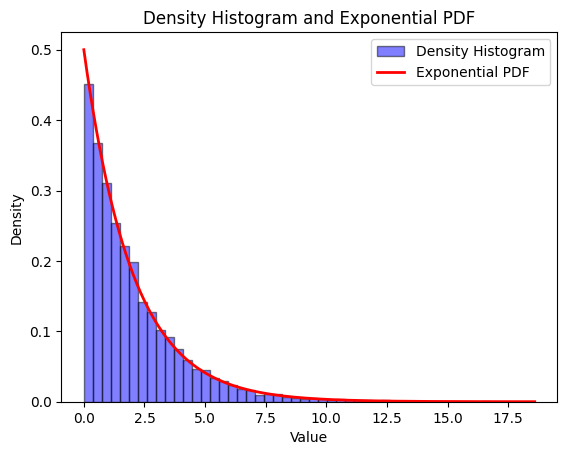

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

# Load random numbers from file
random_numbers = np.loadtxt("random_numbers.txt")

# Plot density histogram
plt.hist(random_numbers, bins=50, density=True, alpha=0.5, color='b',edgecolor='k' ,label='Density Histogram')

# Plot exponential PDF
x = np.linspace(0, np.max(random_numbers), 1000)
y = expon.pdf(x, scale=1/0.5)  # Exponential PDF with mean 0.5
plt.plot(x, y, 'r-', linewidth=2, label='Exponential PDF')

plt.xlabel("Value")
plt.ylabel("Density")
plt.title("Density Histogram and Exponential PDF")
plt.legend()
plt.show()


## Q5)
 Use the Box-Muller method in a Python code to produce 10,000 random numbers
distributed according to a Gaussian distribution with mean 0 and variance 1. Make a
density histogram of your numbers and compare it to the Gaussian PDF.


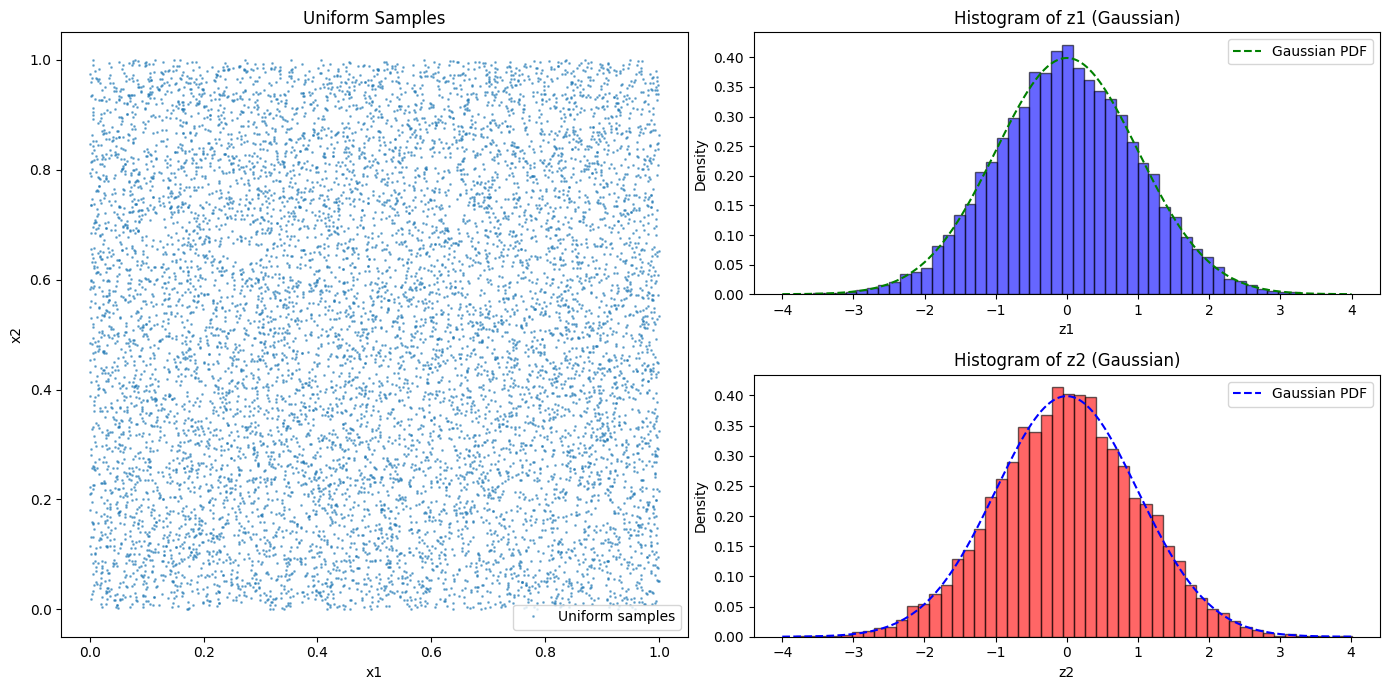

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Generate uniform random numbers
n = 10000
x1 = np.random.rand(n)
x2 = np.random.rand(n)

# Box-Muller transform to generate Gaussian deviates
r = np.sqrt(-2 * np.log(x1))
theta = 2 * np.pi * x2

z1 = r * np.cos(theta)
z2 = r * np.sin(theta)

#Gaussian functional form
x_values = np.linspace(-4, 4, 1000)
gaussian_pdf = (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * x_values**2)



# Create the plots
plt.figure(figsize=(14, 7))


plt.subplot(1, 2, 1)
plt.plot(x1, x2, 'o', markersize=1, alpha=0.5, label='Uniform samples')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Uniform Samples')
plt.legend()


plt.subplot(2, 2, 2)
plt.hist(z1, bins=50, density=True, alpha=0.6, color='b',edgecolor='k')
plt.plot(x_values, gaussian_pdf, 'g--', label='Gaussian PDF')
plt.xlabel('z1')
plt.ylabel('Density')
plt.title('Histogram of z1 (Gaussian)')
plt.legend()

plt.subplot(2, 2, 4)
plt.hist(z2, bins=50, density=True, alpha=0.6, color='r',edgecolor='k')
plt.plot(x_values, gaussian_pdf, 'b--', label='Gaussian PDF')
plt.xlabel('z2')
plt.ylabel('Density')
plt.title('Histogram of z2 (Gaussian)')
plt.legend()


plt.tight_layout()
plt.show()


## Q6)
Using the Rejection Method to Produce Random Numbers

Use the Rejection Method in a Python code to produce random numbers distributed according to the distribution:

$$ f(x) = \sqrt{\frac{2}{\pi}} e^{-x^2/2} \quad (x \ge 0). $$

Make a density histogram of your numbers and compare it to the distribution.


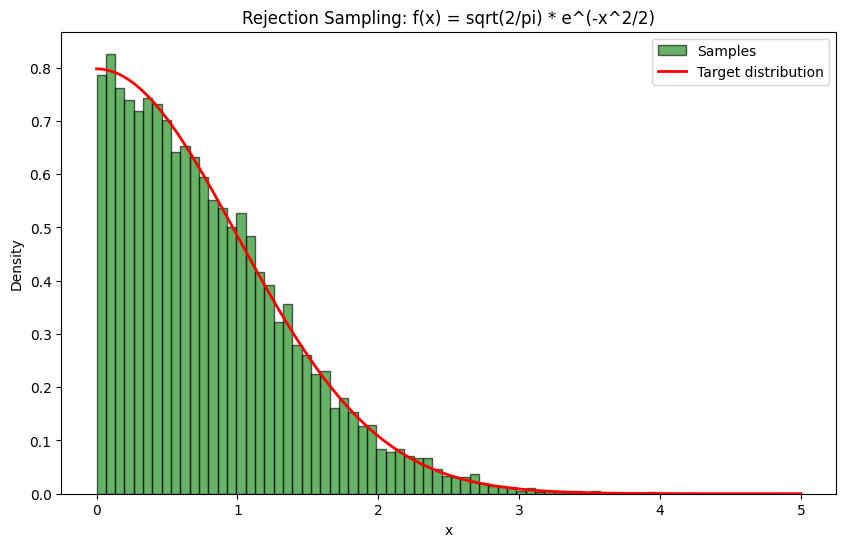

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Target distribution f(x) (normalized to have integral 1 over [0, infinity])
def f(x):
    return np.sqrt(2 / np.pi) * np.exp(-x**2 / 2)

# Proposal distribution g(x) with lambda = 1
def g(x):
    return np.exp(-x)

# Scaling factor c (found empirically or via optimization)
c = np.sqrt(2 * np.exp(1) / np.pi)

# Number of samples to generate
n_samples = 10000
samples = []

while len(samples) < n_samples:
    # Generate a candidate from the proposal distribution
    x_candidate = np.random.exponential(1)
    # Generate a uniform random number for acceptance check
    u = np.random.uniform(0, c * g(x_candidate))
    # Accept or reject the candidate
    if u <= f(x_candidate):
        samples.append(x_candidate)

# Plot the histogram of the samples and the target distribution
x = np.linspace(0, 5, 1000)
plt.figure(figsize=(10, 6))
plt.hist(samples, bins=60, density=True, alpha=0.6, color='g', label='Samples',edgecolor='k')
plt.plot(x, f(x), 'r-', lw=2, label='Target distribution')
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Rejection Sampling: f(x) = sqrt(2/pi) * e^(-x^2/2)')
plt.legend()
plt.show()


## Q.7) Chi-Squared Test for Dice Simulation

Consider the simulation of two dice that we discussed in class. Each die yields an integer 1, 2, 3, 4, 5, 6 with equal probability. Suppose we got these counts in two runs of our simulation:

| Score | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12 |
|-------|---|---|---|---|---|---|---|---|----|----|----|
| Observed counts 1 | 4 | 10 | 10 | 13 | 20 | 18 | 18 | 11 | 13 | 14 | 13 |
| Observed counts 2 | 3 | 7 | 11 | 15 | 19 | 24 | 21 | 17 | 13 | 9 | 5 |

Apply the $\chi^2$ test and label the random numbers as "not sufficiently random", "suspect", "almost suspect", or "sufficiently random".


In [7]:
import numpy as np
from scipy.stats import chi2

# Expected frequencies for the sum of two dice
total_rolls = sum([4, 10, 10, 13, 20, 18, 18, 11, 13, 14, 13])  # Example total, adjust as per actual total
expected_frequencies = np.array([1, 2, 3, 4, 5, 6, 5, 4, 3, 2, 1]) / 36 * total_rolls

# Observed frequencies from the two runs
observed_counts_1 = np.array([4, 10, 10, 13, 20, 18, 18, 11, 13, 14, 13])
observed_counts_2 = np.array([3, 7, 11, 15, 19, 24, 21, 17, 13, 9, 5])

# Calculate chi-squared statistic for the first run
chi2_stat_1 = np.sum((observed_counts_1 - expected_frequencies) ** 2 / expected_frequencies)
p_value_1 = chi2.sf(chi2_stat_1, df=len(expected_frequencies) - 1)

# Calculate chi-squared statistic for the second run
chi2_stat_2 = np.sum((observed_counts_2 - expected_frequencies) ** 2 / expected_frequencies)
p_value_2 = chi2.sf(chi2_stat_2, df=len(expected_frequencies) - 1)

# Define function to classify the randomness
def classify_randomness(p_value):
    if p_value < 0.01:
        return "not sufficiently random"
    elif p_value < 0.05:
        return "suspect"
    elif p_value < 0.1:
        return "almost suspect"
    else:
        return "sufficiently random"

# Classify the results
classification_1 = classify_randomness(p_value_1)
classification_2 = classify_randomness(p_value_2)

print(f"Run 1: Chi2 Stat = {chi2_stat_1:.2f}, p-value = {p_value_1:.4f}, classification = {classification_1}")
print(f"Run 2: Chi2 Stat = {chi2_stat_2:.2f}, p-value = {p_value_2:.4f}, classification = {classification_2}")


Run 1: Chi2 Stat = 29.49, p-value = 0.0010, classification = not sufficiently random
Run 2: Chi2 Stat = 1.14, p-value = 0.9997, classification = sufficiently random


## Q8) Monte Carlo Integration

The area of a circle with unit radius is given by:

$$ I = \int_{-1}^{1} \int_{-1}^{1} f(x, y) \, dx \, dy, $$

where

$$ f(x, y) = \begin{cases} 
1 & \text{if } x^2 + y^2 \leq 1 \\
0 & \text{otherwise}
\end{cases} $$

Calculate this area using Monte Carlo integration. Then calculate the volume of a ten-dimensional unit sphere.


In [8]:
import numpy as np

# Monte Carlo integration for the area of a unit circle
def monte_carlo_area_circle(n_points):
    count_inside = 0
    for _ in range(n_points):
        x, y = np.random.uniform(-1, 1, 2)
        if x**2 + y**2 <= 1:
            count_inside += 1
    return (count_inside / n_points) * 4  # Area of the square is 4

# Calculate the area of a unit circle
n_points = 100000
area_circle = monte_carlo_area_circle(n_points)
print(f"Estimated area of the unit circle: {area_circle}")

# Monte Carlo integration for the volume of a 10-dimensional unit sphere
def monte_carlo_volume_sphere(n_points, dimensions):
    count_inside = 0
    for _ in range(n_points):
        point = np.random.uniform(-1, 1, dimensions)
        if np.sum(point**2) <= 1:
            count_inside += 1
    volume_hypercube = 2 ** dimensions
    return (count_inside / n_points) * volume_hypercube

# Calculate the volume of a 10-dimensional unit sphere
dimensions = 10
volume_sphere = monte_carlo_volume_sphere(n_points, dimensions)
print(f"Estimated volume of the 10-dimensional unit sphere: {volume_sphere}")


Estimated area of the unit circle: 3.1392
Estimated volume of the 10-dimensional unit sphere: 2.22208


## Q9)
 Use the Metropolis algorithm to get a sample from a density that is uniform for 3 <
x < 7 and zero elsewhere. Write your own code for the Metropolis method; don’t use a
library function. Make a plot showing your Markov Chain. Make a density histogram
of your numbers and compare it to the distribution.

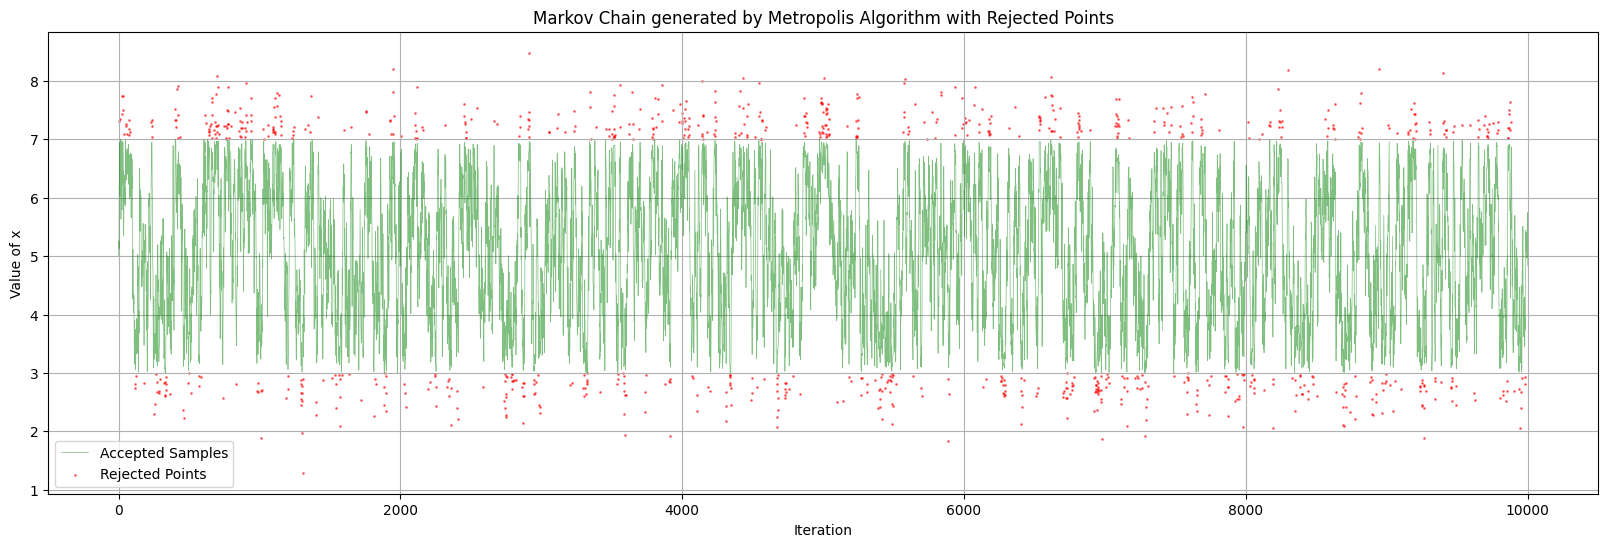

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Metropolis algorithm function
def metropolis_uniform(initial_x, num_samples, step_size):
    samples = [initial_x]
    rejected_points = []
    current_x = initial_x
    
    for i in range(num_samples):
        # Propose a new candidate within the neighborhood of the current point
        candidate_x = current_x + np.random.normal(scale=step_size)
        
        # Acceptance probability based on the ratio of target density at candidate_x to current_x
        acceptance_prob = (3 < candidate_x < 7) / (3 < current_x < 7)
        
        # Accept or reject the candidate
        if np.random.rand() < acceptance_prob:
            current_x = candidate_x
        else:
            rejected_points.append((i, candidate_x))
        
        # Add the accepted sample to the list
        samples.append(current_x)
    
    return np.array(samples), np.array(rejected_points)

# Parameters
initial_x = 5  # Initial point within the range [3, 7]
num_samples = 10000  # Number of samples
step_size = 0.5  # Step size for proposing new samples

# Generate samples using the Metropolis algorithm
samples, rejected_points = metropolis_uniform(initial_x, num_samples, step_size)

# Plot the Markov chain with rejected points
plt.figure(figsize=(20, 6))
plt.plot(samples, color='green', alpha=0.5, linewidth=0.5, label='Accepted Samples')
if len(rejected_points) > 0:
    plt.scatter(rejected_points[:,0], rejected_points[:,1], color='red', alpha=0.5, s=1, label='Rejected Points')
plt.title('Markov Chain generated by Metropolis Algorithm with Rejected Points')
plt.xlabel('Iteration')
plt.ylabel('Value of x')
plt.legend()
plt.grid(True)
plt.show()

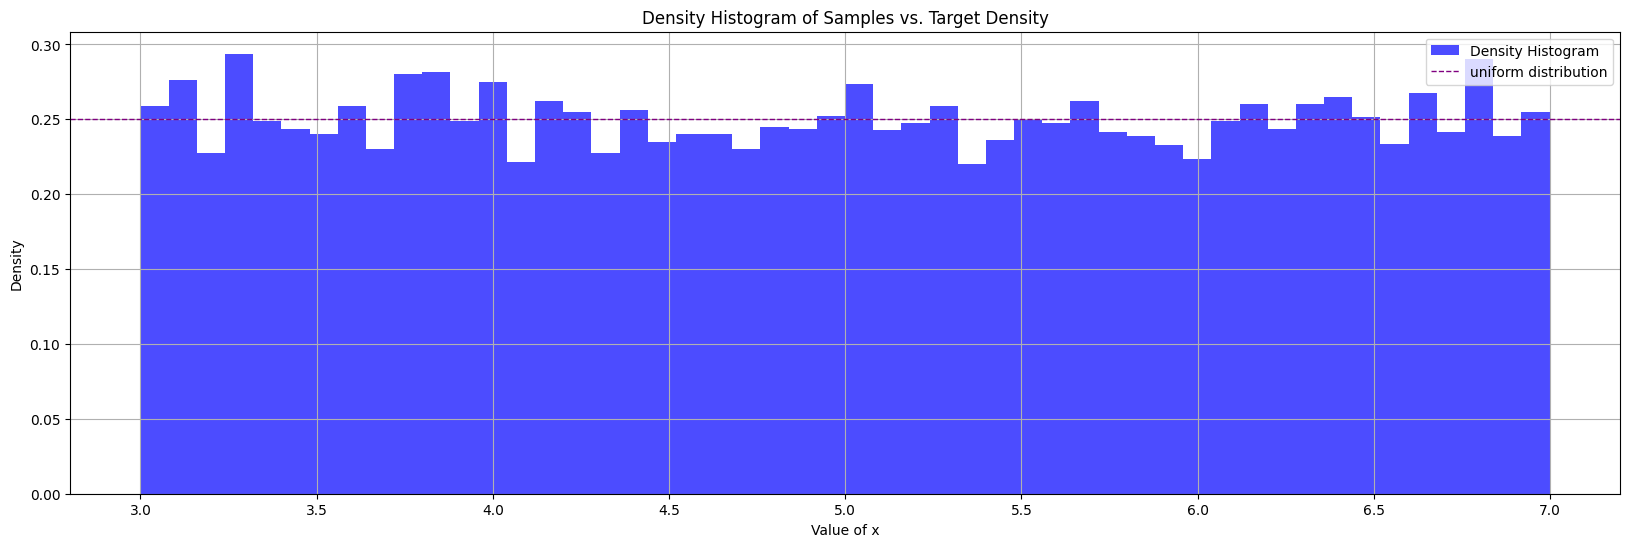

In [22]:
# Plot density histogram of the samples
plt.figure(figsize=(20, 6))
plt.hist(samples, bins=50, density=True, color='blue', alpha=0.7, label='Density Histogram')
plt.axhline(y=0.25, color='purple', linestyle='--', linewidth=1, label='uniform distribution')  
plt.title('Density Histogram of Samples vs. Target Density')
plt.xlabel('Value of x')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

 ## Q.10)
 Consider the data that we discussed in our 19 May lecture. These data are listed in
the file https://theory.tifr.res.in/~kulkarni/data.txt. Use the emcee library
to fit the model
y = $ax^2$ + bx + c
to these data by performing Bayesian probabilistic inference using MCMC. What are
the best-fit values for the parameters a, b, and c, where “best-fit” is defined as the
median of the posterior PDF? What are the one-sigma uncertainties on these values?
Use a Gaussian likelihood and uniform priors in your analysis. Use 50 Markov chains
and 4,000 steps. Make a plot showing all your chains. Use the corner library to
make a plot showing the joint and marginalised posterior PDFs for the three model
parameters. Make a plot showing the data with the best-fit model and 200 models
randomly chosen from the posterior. (Consult the documentation websites for emcee
and corner to figure out how to use these libraries.)


  0%|          | 0/4000 [00:00<?, ?it/s]

100%|██████████| 4000/4000 [00:20<00:00, 192.83it/s]


Best-fit values:
a = -0.008322896175955894 +/- 0.0005144324876428952
b = 3.914935235003247 +/- 0.12457617518234887
c = 1.3399032784903997 +/- 5.942423526988589


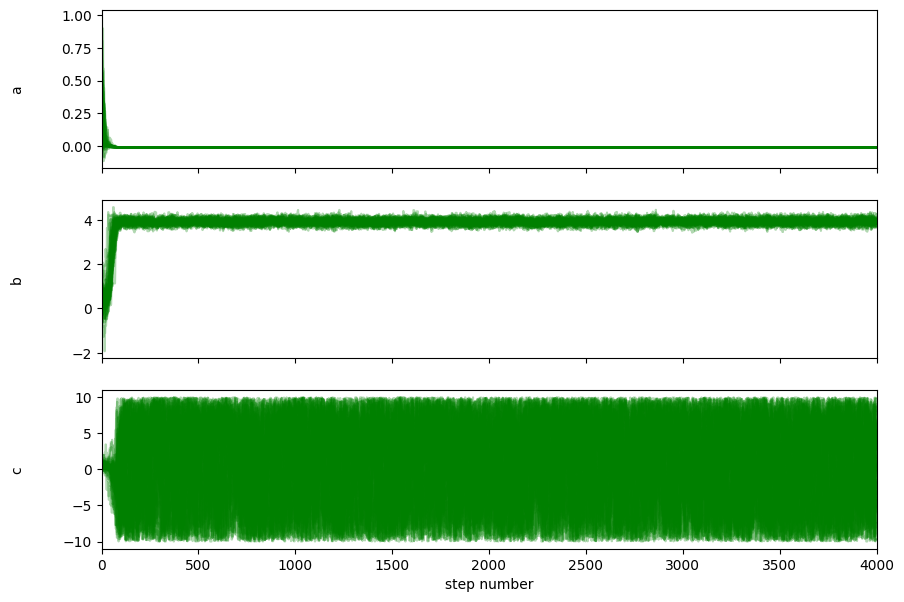

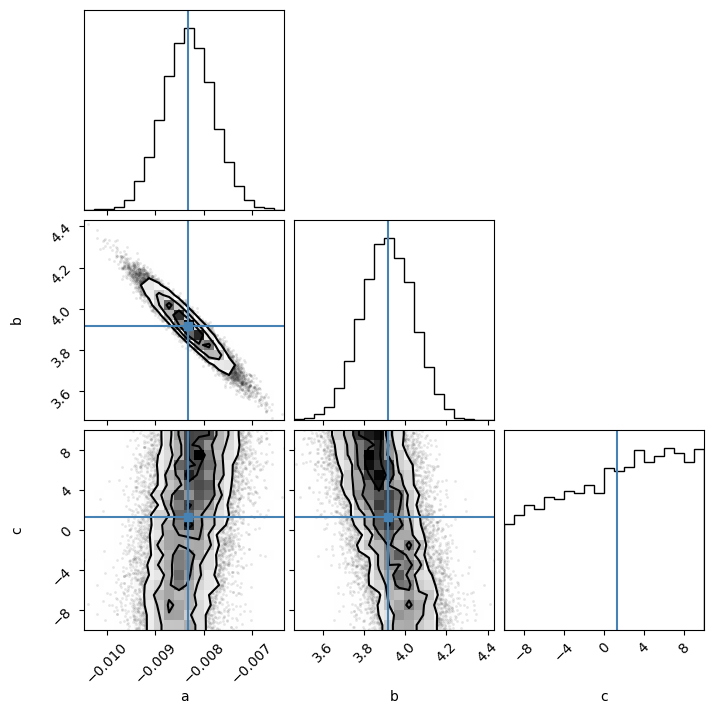

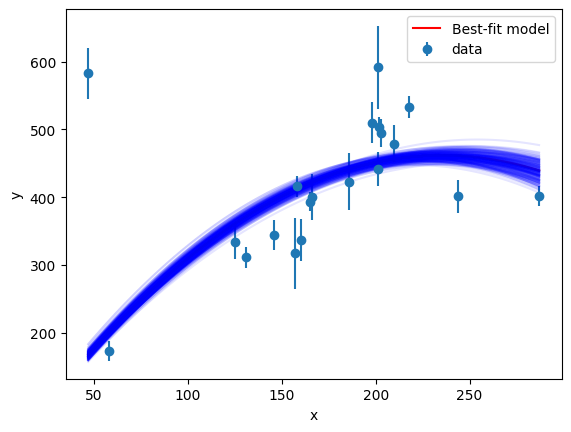

In [19]:
import numpy as np
import emcee
import corner
import matplotlib.pyplot as plt

# Load data, skipping the header row
data = np.loadtxt("https://theory.tifr.res.in/~kulkarni/data.txt", skiprows=4)

# Extracting columns
x_data = data[:, 1]
y_data = data[:, 2]
y_err = data[:, 3]

# Define the model
def model(params, x):
    a, b, c = params
    return a * x**2 + b * x + c

# Define the log likelihood
def log_likelihood(params, x, y, yerr):
    y_model = model(params, x)
    sigma2 = yerr**2
    return -0.5 * np.sum((y - y_model)**2 / sigma2 + np.log(sigma2))

# Define the log prior (uniform priors)
def log_prior(params):
    a, b, c = params
    if -10.0 < a < 10.0 and -10.0 < b < 10.0 and -10.0 < c < 10.0:
        return 0.0
    return -np.inf

# Define the log probability
def log_probability(params, x, y, yerr):
    lp = log_prior(params)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(params, x, y, yerr)

# Initial guess for parameters
np.random.seed(42)
nwalkers = 50
ndim = 3
initial = np.random.rand(nwalkers, ndim)

# Number of steps
nsteps = 4000

# Set up the sampler
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(x_data, y_data, y_err))

# Run MCMC
sampler.run_mcmc(initial, nsteps, progress=True)

# Extract chain
chain = sampler.get_chain()

# Flatten chain
flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)

# Compute median and uncertainties
a_mcmc, b_mcmc, c_mcmc = map(lambda v: np.median(v), flat_samples.T)
a_err, b_err, c_err = map(lambda v: np.percentile(v, [16, 84]), flat_samples.T)

# Print results
print("Best-fit values:")
print("a =", a_mcmc, "+/-", a_err[1] - a_mcmc)
print("b =", b_mcmc, "+/-", b_err[1] - b_mcmc)
print("c =", c_mcmc, "+/-", c_err[1] - c_mcmc)

# Plot chains
fig, axes = plt.subplots(ndim, figsize=(10, 7), sharex=True)
labels = ["a", "b", "c"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(chain[:,:,i], "g", alpha=0.3)
    ax.set_xlim(0, len(chain))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)
axes[-1].set_xlabel("step number")

plt.show()

# Plot corner plot
fig = corner.corner(
    flat_samples, labels=["a", "b", "c"], truths=[a_mcmc, b_mcmc, c_mcmc]
)
plt.show()

# Plot data with best-fit and random models
x_plot = np.linspace(min(x_data), max(x_data), 100)
plt.errorbar(x_data, y_data, yerr=y_err, fmt="o", label="data")
plt.plot(x_plot, model([a_mcmc, b_mcmc, c_mcmc], x_plot), color="red", label="Best-fit model")
for _ in range(200):
    a_rand, b_rand, c_rand = flat_samples[np.random.randint(len(flat_samples))]
    plt.plot(x_plot, model([a_rand, b_rand, c_rand], x_plot), color="blue", alpha=0.1)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()
